# Objectif du script :
-Déterminer comment exploiter les données vocales
-Se familiariser avec les bibliotheques pour traiter signaux audio

In [5]:
import sys, os
import numpy as np
import pandas
import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt
import simpleaudio as sa

In [6]:
file = "viktorovitch.wav"
samplerate, data = wavfile.read(file)

In [7]:
# Etude de la donnée : fichier .wav, echantilloné à  44100Hz, stereo

print(data[100000]) # donnée contient 2 valeurs (stereo)
print(len(data))

## on retire les 10 premieres secondes => applaudissements
data = data[10*samplerate:]
print(len(data))

[499 176]
27982848
27541848


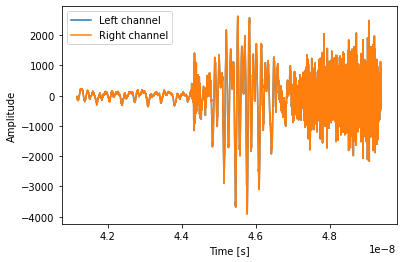

In [8]:
# allure du signal

time =  np.linspace(0, 1/samplerate, data.shape[0])

plt.plot(time[50000:60000], data[50000:60000, 0], label="Left channel")

plt.plot(time[50000:60000], data[50000:60000, 1], label="Right channel")

plt.legend()

plt.xlabel("Time [s]")

plt.ylabel("Amplitude")

plt.show()

In [9]:
# on réduit la donnée mono à un intervalle de N secondes à M secondes

# on restreint à un fichier mono
data_mono = data[:,0]

n,m = int(460000/samplerate), int(500000/samplerate)
#int(460000/samplerate), int(500000/samplerate) #102,103 #100,112 #138,144

red_data = data_mono[n*samplerate:m*samplerate]

sa.play_buffer(red_data.astype(np.int16),1,2,samplerate)

<ipython-input-10-470360abc251>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, dB)


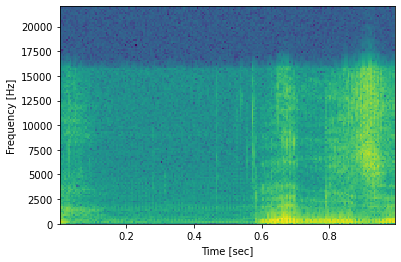

In [10]:
from scipy import signal

f, t, spectrogramme = signal.spectrogram(red_data, samplerate)

#plot de l'énergie
dB = 10 * np.log10(spectrogramme )

plt.pcolormesh(t, f, dB)

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()

In [11]:
#
